In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR

from google.colab import files

In [ ]:
upload = files.upload()

Saving TehranHouse.csv to TehranHouse.csv


In [ ]:
data =pd.read_csv('TehranHouse.csv')

In [ ]:
data['Area'] = data['Area'].str.replace(',', '').astype('float32')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   float32
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float32(1), float64(2), int64(1), object(1)
memory usage: 132.6+ KB


In [ ]:
data.describe()

,Area,Room,Price,Price(USD)
count,3.479000e+03,3479.000000,3.479000e+03,3.479000e+03
mean,8.744000e+06,2.079908,5.359023e+09,1.786341e+05
std,3.167190e+08,0.758275,8.099935e+09,2.699978e+05
min,3.000000e+01,0.000000,3.600000e+06,1.200000e+02
25%,6.900000e+01,2.000000,1.418250e+09,4.727500e+04
50%,9.000000e+01,2.000000,2.900000e+09,9.666667e+04
75%,1.200000e+02,2.000000,6.000000e+09,2.000000e+05
max,1.616000e+10,5.000000,9.240000e+10,3.080000e+06


In [ ]:
data.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70.0,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87.0,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59.0,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54.0,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71.0,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [ ]:
data.isna().sum()

,0
Area,0
Room,0
Parking,0
Warehouse,0
Elevator,0
Address,23
Price,0
Price(USD),0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.duplicated().sum()

208

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data['Parking'] = data['Parking'].map({True:1, False:0})
data['Warehouse'] = data['Warehouse'].map({True:1, False:0})
data['Elevator'] = data['Elevator'].map({True:1, False:0})

In [ ]:
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60.0,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79.0,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3473,63.0,1,1,1,0,Feiz Garden,1.890000e+09,63000.00
3474,86.0,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,1,1,1,Niavaran,6.800000e+09,226666.67
3477,105.0,2,1,1,1,Dorous,5.600000e+09,186666.67


In [ ]:
data.isna().sum()

,0
Area,0
Room,0
Parking,0
Warehouse,0
Elevator,0
Address,0
Price,0
Price(USD),0


In [ ]:
data.drop(['Price(USD)'], inplace=True, axis=1)

In [ ]:
data.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63.0,1,1,1,1,Shahran,1.850000e+09
1,60.0,1,1,1,1,Shahran,1.850000e+09
2,79.0,2,1,1,1,Pardis,5.500000e+08
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09
5,70.0,2,1,1,0,North Program Organization,2.050000e+09
6,87.0,2,1,1,1,Pardis,6.000000e+08
7,59.0,1,1,1,1,Shahran,2.150000e+09
8,54.0,2,1,1,0,Andisheh,4.930000e+08
9,71.0,1,1,1,1,West Ferdows Boulevard,2.370000e+09


In [ ]:
g1 = data.groupby(['Address'])['Price'].mean().sort_values(ascending=False)

In [ ]:
g1.index[:15]

Index(['Gandhi', 'Lavasan', 'Mahmoudieh', 'Vanak', 'Elahieh', 'Argentina',
       'Zaferanieh', 'Velenjak', 'Farmanieh', 'Niavaran', 'Tajrish', 'Dorous',
       'Kamranieh', 'Aqdasieh', 'Ajudaniye'],
      dtype='object', name='Address')

In [ ]:
fig = plt.figure(figsize=(50, 8), facecolor='grey', dpi=500)
sns.barplot(x=g1.index[:30], y=g1.values[:30])

<Axes: xlabel='Address'>

In [ ]:
g2 = data.groupby(['Room'])['Price'].mean()
g3 = data.groupby(['Parking'])['Price'].mean()
g4 = data.groupby(['Warehouse'])['Price'].mean()
g5 = data.groupby(['Elevator'])['Price'].mean()

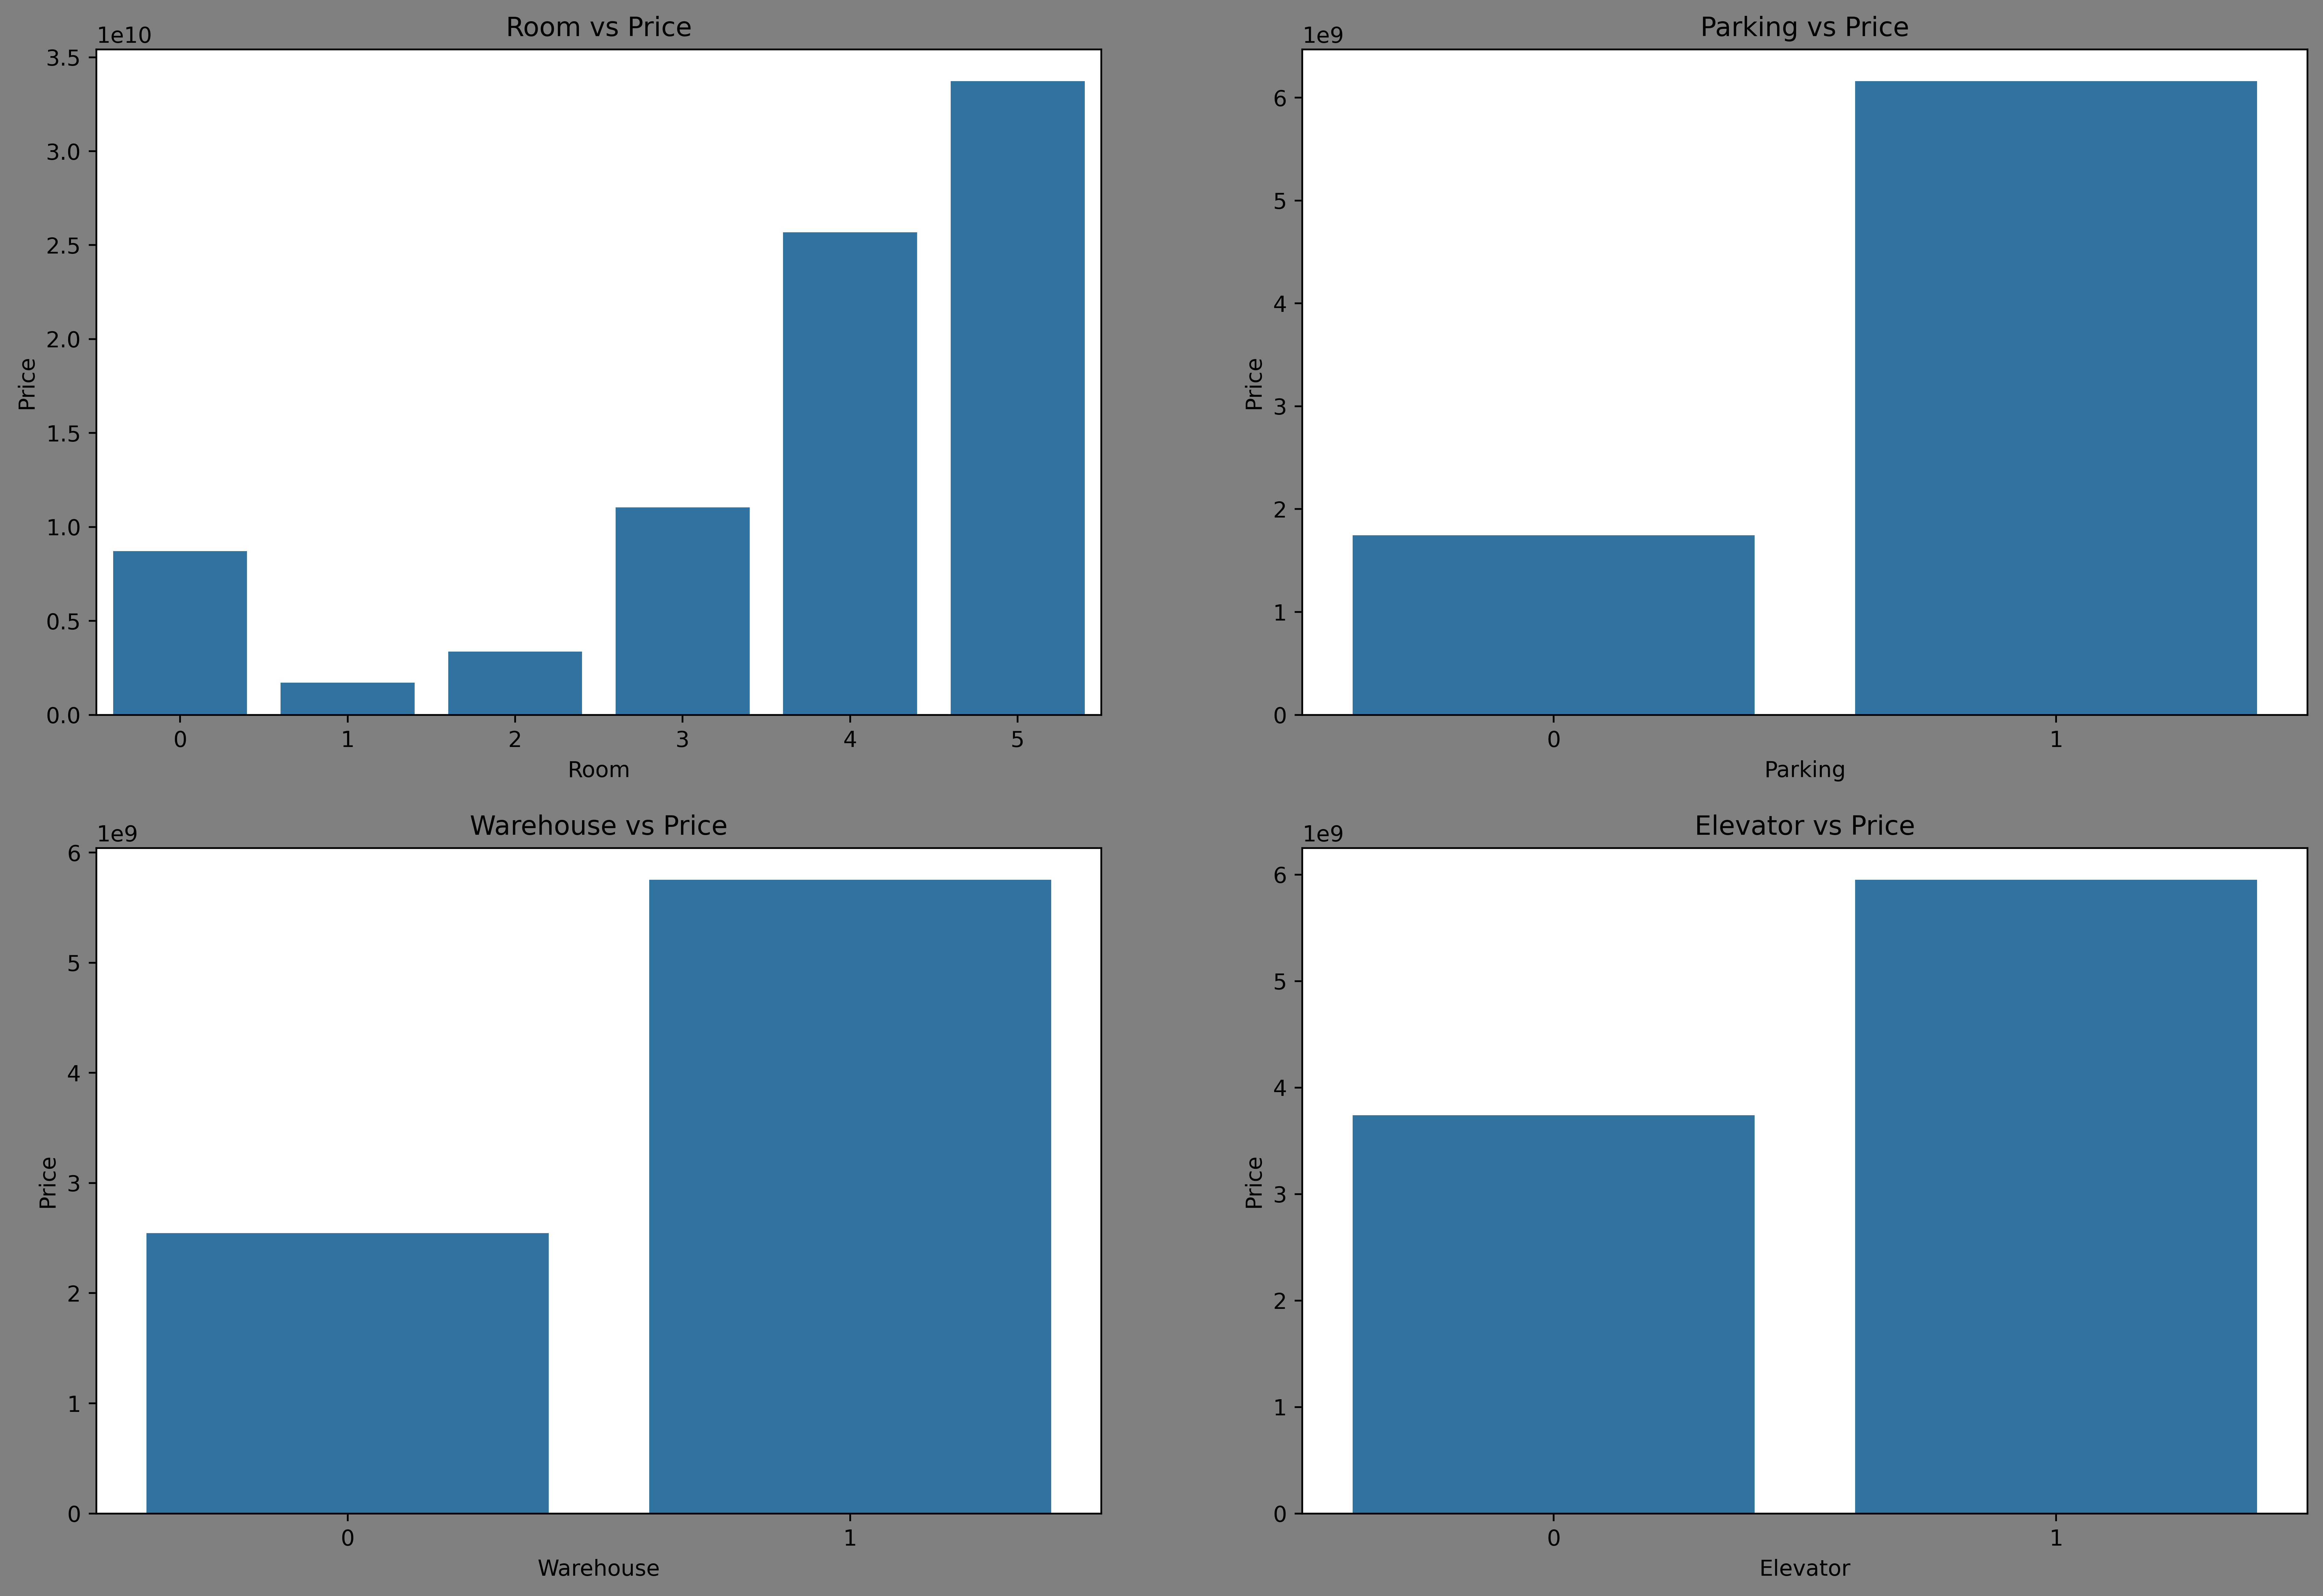

In [ ]:
fig = plt.figure(figsize=(18, 12), facecolor='grey', dpi=500)
ax1 = fig.add_subplot(221)
ax1 = sns.barplot(x=g2.index, y=g2.values)
ax1.set(
    xlabel='Room',
    ylabel='Price',
    title='Room vs Price'
)

ax2 = fig.add_subplot(222)
ax2 = sns.barplot(x=g3.index, y=g3.values)
ax2.set(
    xlabel='Parking',
    ylabel='Price',
    title='Parking vs Price'
)

ax3 = fig.add_subplot(223)
ax3 = sns.barplot(x=g4.index, y=g4.values)
ax3.set(
    xlabel='Warehouse',
    ylabel='Price',
    title='Warehouse vs Price'
)

ax4 = fig.add_subplot(224)
ax4 = sns.barplot(x=g5.index, y=g5.values)
ax4.set(
    xlabel='Elevator',
    ylabel='Price',
    title='Elevator vs Price'
);

In [ ]:
data['Room'].value_counts()

,count
Room,
2,1819
3,694
1,625
4,68
5,33
0,9


In [ ]:
data['Elevator'].value_counts()

,count
Elevator,
1,2551
0,697


In [ ]:
data['Warehouse'].value_counts()

,count
Warehouse,
1,2969
0,279


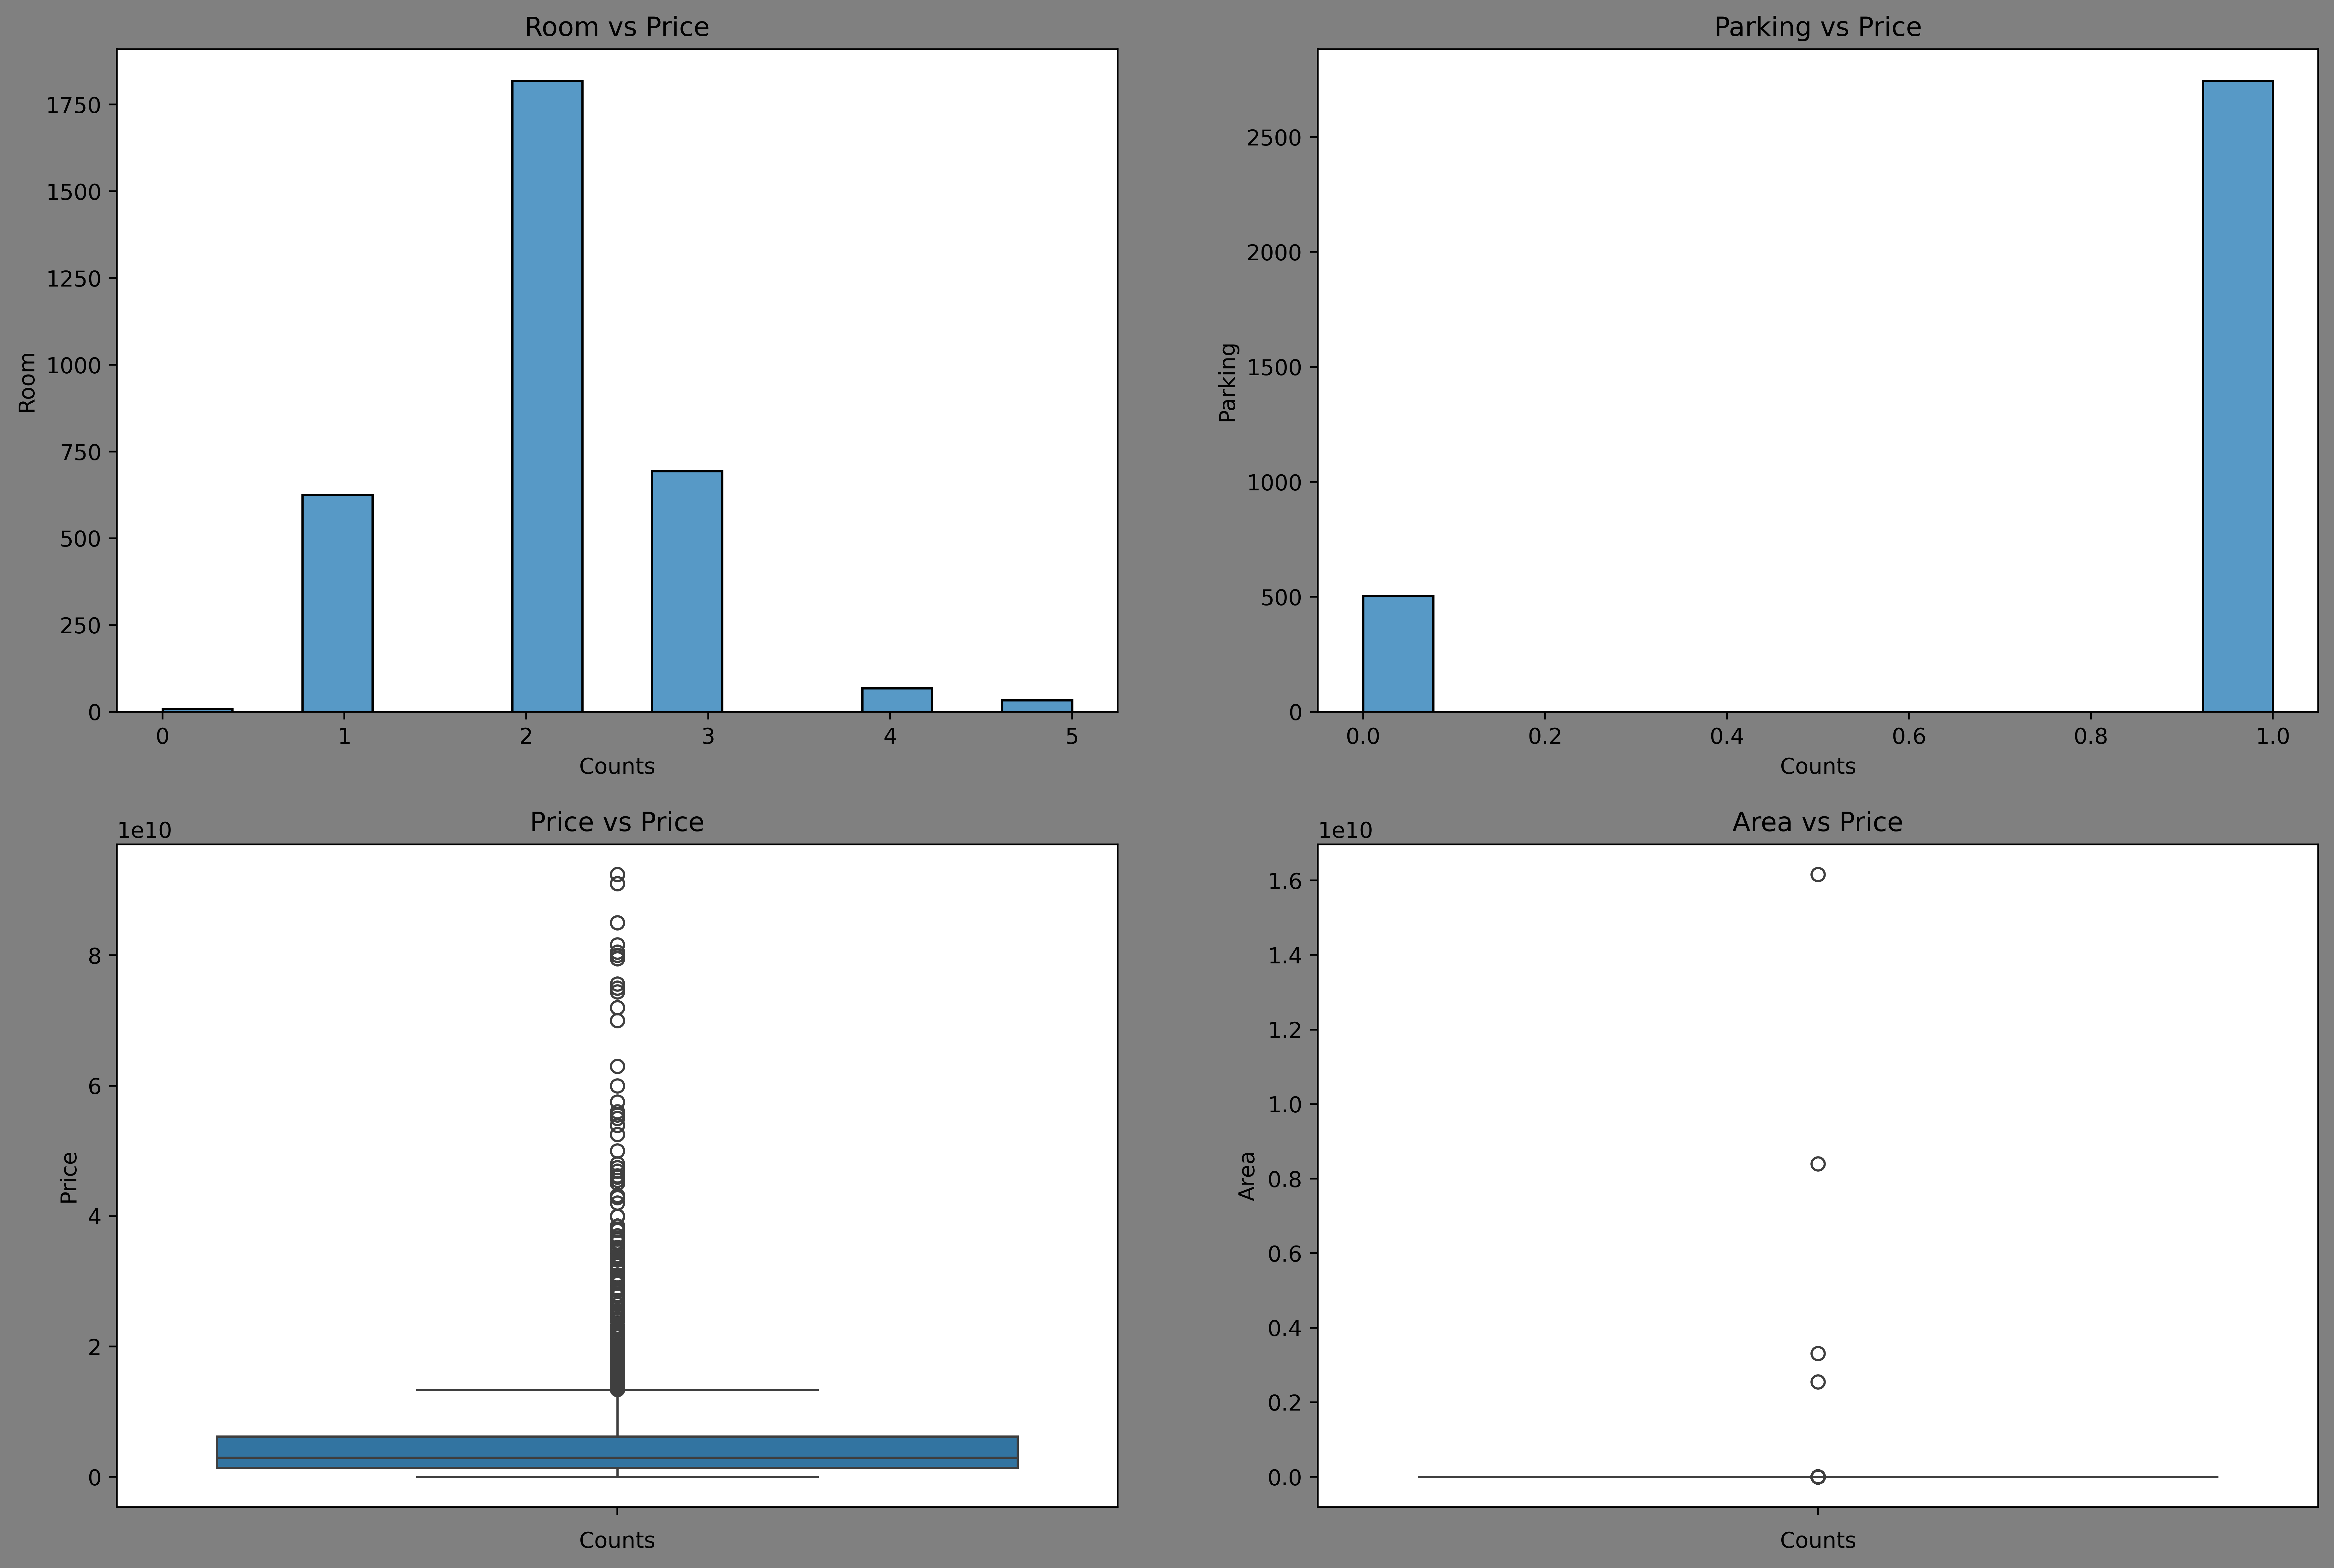

In [ ]:
fig = plt.figure(figsize=(18, 12), facecolor='grey', dpi=500)
ax1 = fig.add_subplot(221)
ax1 = sns.histplot(data['Room'])
ax1.set(
    xlabel='Counts',
    ylabel='Room',
    title='Room vs Price'
)

ax2 = fig.add_subplot(222)
ax2 = sns.histplot(data['Parking'])
ax2.set(
    xlabel='Counts',
    ylabel='Parking',
    title='Parking vs Price'
)

ax3 = fig.add_subplot(223)
ax3 = sns.boxplot(data['Price'])
ax3.set(
    xlabel='Counts',
    ylabel='Price',
    title='Price vs Price'
)

ax4 = fig.add_subplot(224)
ax4 = sns.boxplot(data['Area'])
ax4.set(
    xlabel='Counts',
    ylabel='Area',
    title='Area vs Price'
);

In [ ]:
data[data['Area']>= 500]

,Area,Room,Parking,Warehouse,Elevator,Address,Price
285,5.000000e+02,2,1,1,0,Absard,3.900000e+09
356,6.500000e+02,2,1,1,0,Absard,5.200000e+09
431,6.600000e+02,5,1,1,0,Lavasan,5.500000e+10
570,3.310000e+09,2,1,1,1,Ostad Moein,3.310000e+09
573,8.630000e+02,2,1,1,1,Gheitarieh,7.830000e+09
709,1.616000e+10,3,1,1,1,Pasdaran,1.616000e+10
807,1.000000e+03,2,1,1,0,Damavand,7.000000e+09
819,6.800000e+02,5,1,1,0,Ekhtiarieh,8.160000e+10
831,7.500000e+02,5,1,1,1,Mahmoudieh,7.500000e+10
1236,6.000000e+02,2,1,1,1,Qalandari,9.150000e+09


In [ ]:
data = data[data['Room'] > 0]

In [ ]:
data = data[data['Area'] <= 500]

In [ ]:
len(data['Address'].unique())

191

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

neighborhood_encoded = encoder.fit_transform(data[['Address']])
df_neighborhood_encded = pd.DataFrame(neighborhood_encoded, columns=encoder.get_feature_names_out())

In [ ]:
df_neighborhood_encded

,Address_Abazar,Address_Abbasabad,Address_Absard,Address_Abuzar,Address_Afsarieh,Address_Ahang,Address_Air force,Address_Ajudaniye,Address_Alborz Complex,Address_Aliabad South,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = data.reset_index(drop=True)
df_neighborhood_encded = df_neighborhood_encded.reset_index(drop=True)

df_final = pd.concat([data.drop(['Address'], axis=1), df_neighborhood_encded], axis=1)

In [ ]:
df_final.head(10)

,Area,Room,Parking,Warehouse,Elevator,Price,Address_Abazar,Address_Abbasabad,Address_Absard,Address_Abuzar,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
0,63.0,1,1,1,1,1.850000e+09,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60.0,1,1,1,1,1.850000e+09,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79.0,2,1,1,1,5.500000e+08,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,95.0,2,1,1,1,9.025000e+08,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,123.0,2,1,1,1,7.000000e+09,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,70.0,2,1,1,0,2.050000e+09,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,87.0,2,1,1,1,6.000000e+08,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,59.0,1,1,1,1,2.150000e+09,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,54.0,2,1,1,0,4.930000e+08,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,71.0,1,1,1,1,2.370000e+09,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3217 entries, 0 to 3216
Columns: 197 entries, Area to Address_Zibadasht
dtypes: float32(1), float64(192), int64(4)
memory usage: 4.8 MB


In [ ]:
df_final.isna().sum()

,0
Area,0
Room,0
Parking,0
Warehouse,0
Elevator,0
...,...
Address_Yousef Abad,0
Address_Zafar,0
Address_Zaferanieh,0
Address_Zargandeh,0


In [ ]:
X = df_final.drop(['Price'], axis=1)
y = df_final['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

In [ ]:
dec = PCA()
dec.fit(X_train)

dec.explained_variance_ratio_

array([1.44144747e-02, 9.54636283e-03, 7.03752707e-03, 5.87140502e-03,
       5.62951796e-03, 5.50958425e-03, 5.48957991e-03, 5.48207348e-03,
       5.47857086e-03, 5.45203038e-03, 5.44313502e-03, 5.41645916e-03,
       5.40990252e-03, 5.40290340e-03, 5.39752874e-03, 5.38468091e-03,
       5.38120289e-03, 5.37281051e-03, 5.37143739e-03, 5.36419899e-03,
       5.36040070e-03, 5.35923871e-03, 5.35482791e-03, 5.34974577e-03,
       5.33983336e-03, 5.33896732e-03, 5.33812984e-03, 5.32876412e-03,
       5.32256002e-03, 5.32142672e-03, 5.31749478e-03, 5.31421895e-03,
       5.31130263e-03, 5.30876826e-03, 5.30543502e-03, 5.30442908e-03,
       5.30244402e-03, 5.30178868e-03, 5.29828283e-03, 5.29739152e-03,
       5.29667885e-03, 5.29653575e-03, 5.29563531e-03, 5.29479517e-03,
       5.29412616e-03, 5.29337181e-03, 5.29277807e-03, 5.29053977e-03,
       5.29027330e-03, 5.28897334e-03, 5.28795275e-03, 5.28781101e-03,
       5.28753950e-03, 5.28674817e-03, 5.28635109e-03, 5.28502841e-03,
      

In [ ]:
a = 0
for i in dec.explained_variance_ratio_:
  a += i
  if a >= (0.95):
    print(a)
    print(dec.explained_variance_ratio_.tolist().index(i))
    break

0.9526876506665439
176


In [ ]:
# Fit a Regression Model (e.g., XGBoost)
model = XGBR(objective='reg:squarederror',
             reg_alpha=0.1,
             reg_lambda=0.1,
             n_estimators=150,
             random_state=42)
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 Score: 0.7417843950310574
RMSE: 0.5667553567654809


## so OneHotEncoding then apply a pca for dimensionality reduction wasn't a good choice
### Now Let's try another way :)

In [ ]:
data.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63.0,1,1,1,1,Shahran,1.850000e+09
1,60.0,1,1,1,1,Shahran,1.850000e+09
2,79.0,2,1,1,1,Pardis,5.500000e+08
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09
5,70.0,2,1,1,0,North Program Organization,2.050000e+09
6,87.0,2,1,1,1,Pardis,6.000000e+08
7,59.0,1,1,1,1,Shahran,2.150000e+09
8,54.0,2,1,1,0,Andisheh,4.930000e+08
9,71.0,1,1,1,1,West Ferdows Boulevard,2.370000e+09


In [ ]:
g1 = data.groupby(['Address'])['Price'].mean().sort_values(ascending=False).reset_index()
g1.columns = ['Address', 'Mean Price']

In [ ]:
df = data.merge(g1, on='Address', how='left')

In [ ]:
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Mean Price
0,63.0,1,1,1,1,Shahran,1.850000e+09,3.026976e+09
1,60.0,1,1,1,1,Shahran,1.850000e+09,3.026976e+09
2,79.0,2,1,1,1,Pardis,5.500000e+08,7.937154e+08
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08,9.077438e+08
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09,1.199339e+10
5,70.0,2,1,1,0,North Program Organization,2.050000e+09,5.394808e+09
6,87.0,2,1,1,1,Pardis,6.000000e+08,7.937154e+08
7,59.0,1,1,1,1,Shahran,2.150000e+09,3.026976e+09
8,54.0,2,1,1,0,Andisheh,4.930000e+08,1.848002e+09
9,71.0,1,1,1,1,West Ferdows Boulevard,2.370000e+09,3.183331e+09


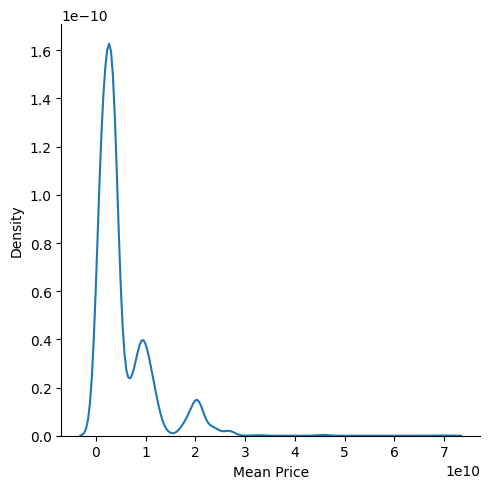

In [ ]:
sns.displot(df['Mean Price'], kind='kde')

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
X = df[['Mean Price']]

In [ ]:
distortions = []
K = [i for i in range(1, 15)]

for k in K:
  Kmeans_model = KMeans(n_clusters=k).fit(X)
  Kmeans_model.fit(X)
  distortions.append(sum(np.min(cdist(X, Kmeans_model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

In [ ]:
distortions

[4088440202.594454,
 2126297475.1090994,
 1241825620.4678824,
 1199383706.1321418,
 1107839400.0764782,
 623806410.187502,
 686779685.1800419,
 586737933.245874,
 489856462.40071255,
 473621276.6612944,
 398798220.7555141,
 372549320.7917183,
 339092258.1685664,
 269265799.76414406]

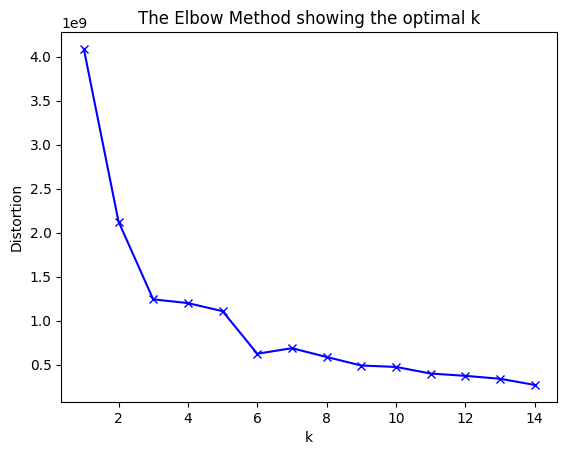

         count          mean           std           min           25%  \
Cluster                                                                  
0        530.0  3.374898e+09  3.448358e+09  3.400000e+08  1.147500e+09   
1         41.0  1.859083e+10  9.349066e+09  7.068750e+08  9.396412e+09   
2        133.0  1.144661e+10  7.051266e+09  5.397373e+08  7.031974e+09   
3        238.0  2.319313e+09  2.656420e+09  2.500000e+08  1.409923e+09   
4        398.0  5.321910e+09  4.591913e+09  5.397373e+08  2.955000e+09   
5          9.0  1.271512e+10  2.215639e+10  2.958611e+09  2.958611e+09   
6         67.0  1.473289e+10  7.599139e+09  1.257423e+09  8.916193e+09   
7        382.0  2.902059e+09  2.375982e+09  3.275000e+08  1.514571e+09   
8        111.0  1.212977e+10  6.483566e+09  8.800000e+08  8.120250e+09   
9        210.0  6.755860e+09  5.185397e+09  5.397373e+08  3.097176e+09   
10        23.0  1.469101e+10  1.121913e+10  9.256000e+08  6.361955e+09   
11       488.0  3.075346e+09  2.501699

In [ ]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# 5. Perform K-Means Clustering (choose the optimal 'k' based on the elbow plot)
kmeans = KMeans(n_clusters=14, random_state=42)  # Example: Choosing 3 clusters
df['Cluster'] = kmeans.fit_predict(X)

# 6. Analyze Cluster Characteristics
print(df.groupby('Cluster')['Mean Price'].describe())

In [ ]:
grouped_df = df.groupby('Cluster')['Mean Price'].describe()

cluster_counts =grouped_df['count']

# Calculate the percentage of observations in each cluster
cluster_percentages = (cluster_counts / cluster_counts.sum()) * 100

grouped_df['Percentage_of_Observations'] = cluster_percentages

print(grouped_df)

         count          mean           std           min           25%  \
Cluster                                                                  
0        530.0  3.374898e+09  3.448358e+09  3.400000e+08  1.147500e+09   
1         41.0  1.859083e+10  9.349066e+09  7.068750e+08  9.396412e+09   
2        133.0  1.144661e+10  7.051266e+09  5.397373e+08  7.031974e+09   
3        238.0  2.319313e+09  2.656420e+09  2.500000e+08  1.409923e+09   
4        398.0  5.321910e+09  4.591913e+09  5.397373e+08  2.955000e+09   
5          9.0  1.271512e+10  2.215639e+10  2.958611e+09  2.958611e+09   
6         67.0  1.473289e+10  7.599139e+09  1.257423e+09  8.916193e+09   
7        382.0  2.902059e+09  2.375982e+09  3.275000e+08  1.514571e+09   
8        111.0  1.212977e+10  6.483566e+09  8.800000e+08  8.120250e+09   
9        210.0  6.755860e+09  5.185397e+09  5.397373e+08  3.097176e+09   
10        23.0  1.469101e+10  1.121913e+10  9.256000e+08  6.361955e+09   
11       488.0  3.075346e+09  2.501699

In [ ]:
# Replace 'Address' with cluster information
df['Cluster'] = kmeans.fit_predict(X)

# Drop Address and Mean Price columns if they're no longer needed
df_final = df.drop(['Address', 'Mean Price'], axis=1)

# Train-Test Split for Regression
X = df_final.drop('Price', axis=1)
y = df_final['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features
scaler = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Fit a Regression Model (e.g., XGBoost)
model = XGBR(objective='reg:squarederror',
             reg_alpha=0.1,
             reg_lambda=0.1,
             n_estimators=150,
             random_state=42)
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 Score: 0.618910114129449
RMSE: 0.6885224454349826
